We will work with a real world dataset.

The dataset we'll be working with is one of the datasets from a huge study in the US called the National Survey of Family Growth (NSFG).  It contains pregnancy and birth data from 2002.  Each pregnancy is a row of data in this table.

The following variables from the data are relevant:
- _caseid_ is the integer ID of the respondent
- _prglngth_ is the integer duration of the pregnancy in weeks
- _outcome_ is an integer code for the outcome of the pregnancy.  The code 1 indicates a live birth.
- _pregordr_ is a pregnancy serial number, e.g., for this respondent, first pregnancy has pregordr 1, etc.
- _birthord_ is a serial number for live births, e.g., code for a respondent's first child is 1, etc.
- _birthwgt_lb_ and _birthwgt_oz_ contain the pound and ounce part of the birth weight
- _totalwgt_lb_ is the floating point value of total birth weight combining _birthwgt_lb_ and _birthwb_oz_
- _agepreg_ is the mother's age at the end of pregnancy

## Load data

1. download data file (link in Course Master) to your local computer; import this file into colab

2. use the URL provided here (also in Course Master) to load it directly into colab.

https://github.com/otu-yz/stats-2020/blob/master/FemPreg2002.csv?raw=true

The data is in **csv** format.

In [ ]:
# prompt: upload a file from local

from google.colab import files
uploaded = files.upload()


Use a data analysis library called _pandas_.

In [ ]:
import pandas as pd

Read data from file into a Pandas DataFrame.

In [ ]:
data = pd.read_csv('FemPreg2002.csv')

In [ ]:
url="https://github.com/otu-yz/stats-2020/blob/master/FemPreg2002.csv?raw=true"
preg = pd.read_csv(url)

In [ ]:
preg.agepreg

,agepreg
0,0.3316
1,0.3925
2,0.1433
3,0.1783
4,0.1833
...,...
13588,0.1791
13589,0.1850
13590,0.1975
13591,0.2158


_preg_ is a DataFrame that contains the 7MB of FemPreg data.

In [ ]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [ ]:
preg.agepreg

,agepreg
0,0.3316
1,0.3925
2,0.1433
3,0.1783
4,0.1833
...,...
13588,0.1791
13589,0.1850
13590,0.1975
13591,0.2158


In [ ]:
preg.agepreg = preg.agepreg*100
preg.agepreg

,agepreg
0,33.16
1,39.25
2,14.33
3,17.83
4,18.33
...,...
13588,17.91
13589,18.50
13590,19.75
13591,21.58


In [ ]:
print(preg.agepreg.mean())
print(preg.agepreg.var())
preg.agepreg.std()

24.6881511970395
33.8108290590111


5.81470799430299

Other statistics like median(50%) and Q1(25%), Q3(75%)

Median is 0.5 quantile.

In [ ]:
preg.agepreg.quantile(0.5)

np.float64(23.91)

Q3 or third quartile -- data value for which 75% of the values are less than it

In [ ]:
print(preg.agepreg.quantile(0.75))

28.660000000000004


In [ ]:
print(preg.agepreg.quantile(0.25))

20.07999999999999


Interquartile range (IQR) = Q3 - Q1

In [ ]:
preg.agepreg.quantile(0.75) - preg.agepreg.quantile(0.25)

np.float64(8.580000000000013)

If not using pandas, and say, just using NumPy arrays.  Use NumPy functions.

In [ ]:
import numpy as np

In [ ]:
data = preg.agepreg

In [ ]:
np.quantile(data, 0.5)
np.nanquantile(data, 0.5)

np.float64(23.91)

In [ ]:
np.mean(data)
np.std(data)
np.quantile(data, 0.25)

np.float64(nan)

In [ ]:
data = data.dropna()

In [ ]:
np.quantile(data, 0.5)

np.float64(23.91)

In [ ]:
np.percentile(data, 50)

np.float64(23.91)

In [ ]:
np.nanquantile(data, 0.5)

np.float64(23.91)

In [ ]:
preg.shape

(13593, 244)

Access a particular column.

In [ ]:
preg['outcome']

,outcome
0,1
1,1
2,1
3,1
4,1
...,...
13588,1
13589,2
13590,2
13591,1


In [ ]:
preg['agepreg']
preg.agepreg

,agepreg
0,33.16
1,39.25
2,14.33
3,17.83
4,18.33
...,...
13588,17.91
13589,18.50
13590,19.75
13591,21.58


To look at a particular respondent.

In [ ]:
case2345 = preg[preg.caseid==2345]

In [ ]:
case2345

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
2672,2345,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4312.70449,4966.002654,5385.629878,2,16,NaN,7.00
2673,2345,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4312.70449,4966.002654,5385.629878,2,16,NaN,8.75
2674,2345,3,6.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,4312.70449,4966.002654,5385.629878,2,16,NaN,NaN


In [ ]:
case2345[['outcome', 'birthord', 'totalwgt_lb', 'prglngth']]

,outcome,birthord,totalwgt_lb,prglngth
2672,1,1.0,7.00,39
2673,1,2.0,8.75,39
2674,6,NaN,NaN,26


Find some unusual observations.  For example, find pregancies that lasted more than 45 weeks.

In [ ]:
preg[preg.prglngth > 45][['caseid', 'prglngth']]

,caseid,prglngth
2416,2145,48
4783,4285,50
4920,4388,48
6889,6251,48
6890,6251,48
7158,6496,48
7161,6496,48
7592,6896,48
8998,8250,50
11357,10451,47


Find and visualize the distribution of a variable, i.e., count the number of occurence of each particular value that variable takes on.

For instance, look at 'outcome' variable.

In [ ]:
outcome_counts = preg.outcome.value_counts().sort_index()
outcome_counts

,count
outcome,
1,9148
2,1862
3,120
4,1921
5,190
6,352


In [ ]:
birthwgt_counts = preg.birthwgt_lb.value_counts().sort_index()
birthwgt_counts

,count
birthwgt_lb,
0.0,8
1.0,40
2.0,53
3.0,98
4.0,229
5.0,697
6.0,2223
7.0,3049
8.0,1889


Plot the distribution of 'outcome' variable, using a histogram.

In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'frequency')

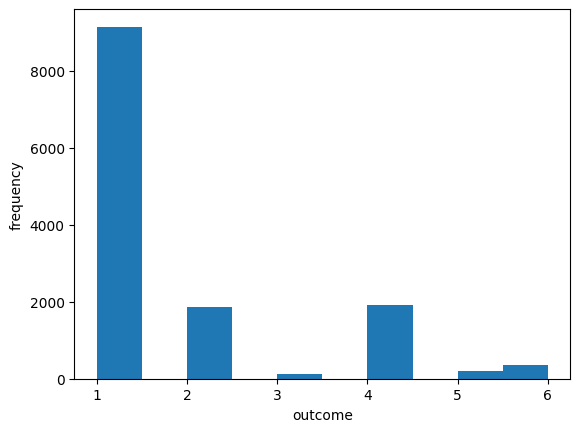

In [ ]:
plt.hist(preg.outcome)
plt.xlabel('outcome')
plt.ylabel('frequency')

The _birthwgt\_lb_ and the _birthwgt\_oz_ variables are the pound part and the ounce part of the birth weight, respectively.

Distribution of the pound part of birthweight should follow a similar distribution as just the birth weight.

In [ ]:
preg[['totalwgt_lb', 'birthwgt_lb', 'birthwgt_oz']]

,totalwgt_lb,birthwgt_lb,birthwgt_oz
0,8.8125,8.0,13.0
1,7.8750,7.0,14.0
2,9.1250,9.0,2.0
3,7.0000,7.0,0.0
4,6.1875,6.0,3.0
...,...,...,...
13588,6.1875,6.0,3.0
13589,NaN,NaN,NaN
13590,NaN,NaN,NaN
13591,7.5000,7.0,8.0


Text(0, 0.5, 'frequency')

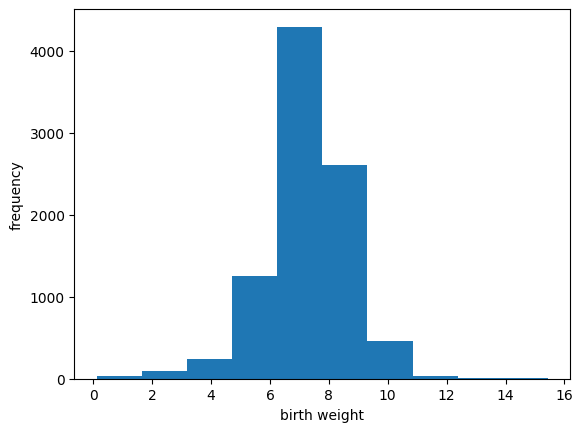

In [ ]:
plt.hist(preg.totalwgt_lb, ec='black')
plt.xlabel('birth weight')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

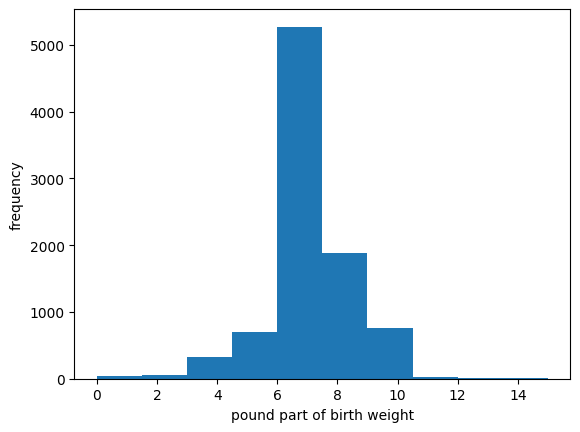

In [ ]:
plt.hist(preg.birthwgt_lb, ec='black')
plt.xlabel('pound part of birth weight')
plt.ylabel('frequency')

Plot the distribution of the ounce part of the birthweight.

Text(0, 0.5, 'frequency')

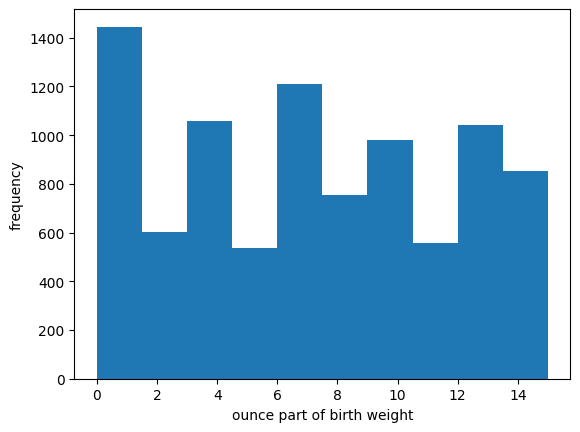

In [ ]:
plt.hist(preg.birthwgt_oz, ec='black')
plt.xlabel('ounce part of birth weight')
plt.ylabel('frequency')

What is the proportion of live births -- what fraction of the total number of births have an outcome code of 1?

In [ ]:
outcome_counts[1] / sum(outcome_counts)

np.float64(0.6729934525123226)

Want to see if there is a relationship between two variables, use a scatterplot.

Ex. Is there a relationship between mother's age and birth weight?

In [ ]:
preg.agepreg

,agepreg
0,33.16
1,39.25
2,14.33
3,17.83
4,18.33
...,...
13588,17.91
13589,18.50
13590,19.75
13591,21.58


Text(0, 0.5, 'birth weight')

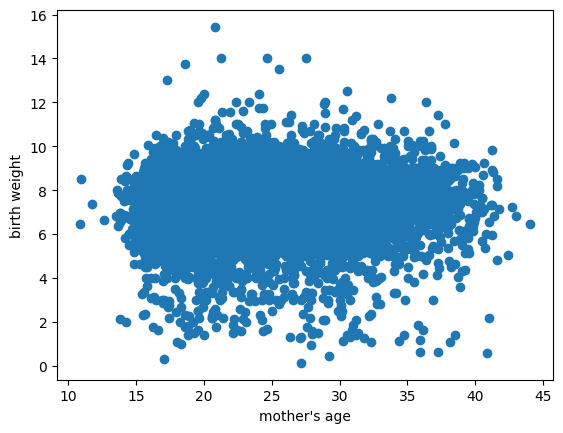

In [ ]:
plt.scatter(preg.agepreg, preg.totalwgt_lb)
plt.xlabel('mother\'s age')
plt.ylabel('birth weight')

Is there a relationship between pregnancy length and birth weight?

Text(0, 0.5, 'birth weight')

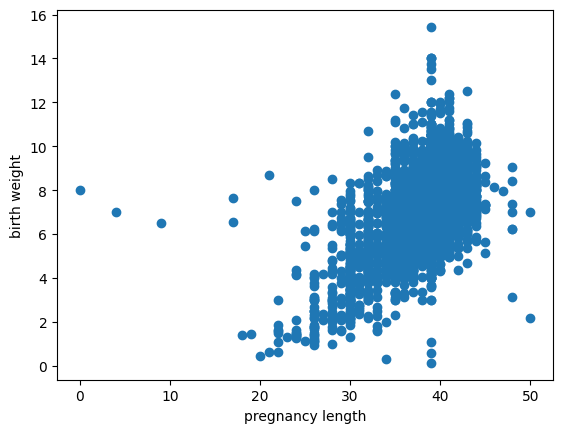

In [ ]:
plt.scatter(preg.prglngth, preg.totalwgt_lb)
plt.xlabel('pregnancy length')
plt.ylabel('birth weight')

Compare the birth weight of first-born and not-firt-born babies.

In [ ]:
firsts = preg[preg.birthord == 1]
others = preg[preg.birthord != 1]

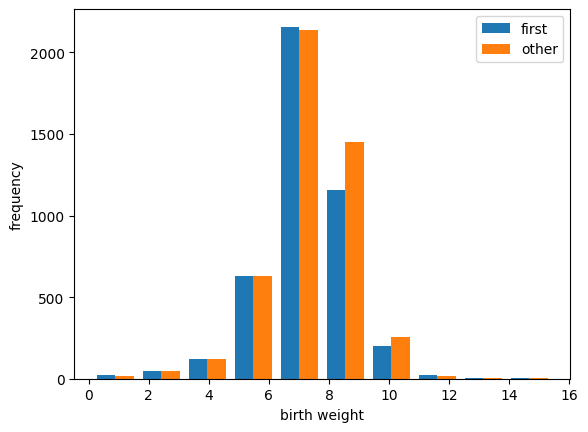

In [ ]:
plt.hist([firsts.totalwgt_lb, others.totalwgt_lb], label=['first', 'other'])
plt.xlabel('birth weight')
plt.ylabel('frequency')
plt.legend()

Find the mean birth weight of first-born, and the mean birth weight of the not first born.

In [ ]:
firsts.totalwgt_lb.mean()

np.float64(7.201094430437772)

In [ ]:
others.totalwgt_lb.mean()

np.float64(7.325855614973262)

In [ ]:
firsts.totalwgt_lb

,totalwgt_lb
0,8.8125
2,9.1250
5,8.5625
8,7.5625
10,7.8125
...,...
13576,6.4375
13578,6.0000
13581,6.3750
13584,6.3750


In [ ]:
firsts = firsts.dropna(subset=['totalwgt_lb'])

(array([2.400e+01, 4.600e+01, 1.230e+02, 6.290e+02, 2.157e+03, 1.155e+03,
        2.030e+02, 2.000e+01, 4.000e+00, 2.000e+00]),
 array([ 0.125  ,  1.65625,  3.1875 ,  4.71875,  6.25   ,  7.78125,
         9.3125 , 10.84375, 12.375  , 13.90625, 15.4375 ]),
 <BarContainer object of 10 artists>)

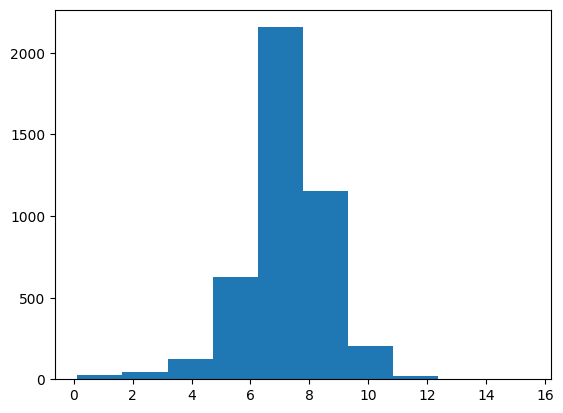

In [ ]:
plt.hist(firsts.totalwgt_lb)

Plot a histogram with relative frequencies.  Set a weight of 1/(total num of counts) to be multiplied to each raw frequency.

In [ ]:
import numpy as np

In [ ]:
len(firsts)

4363

Text(0, 0.5, 'relative frequency')

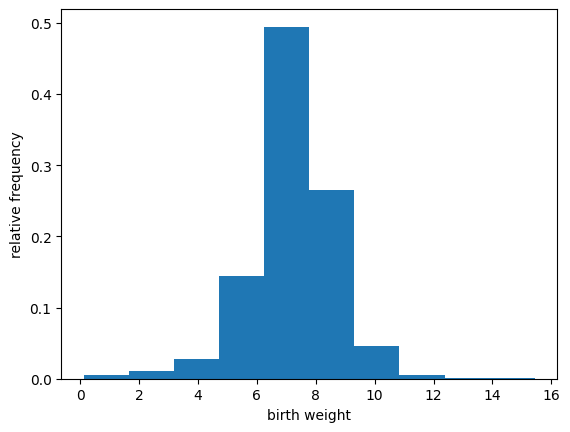

In [ ]:
plt.hist(firsts.totalwgt_lb, weights=np.ones(len(firsts))/(len(firsts)))
plt.xlabel('birth weight')
plt.ylabel('relative frequency')